In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# data = load_breast_cancer()
# x = data.data
# y = data.target

In [2]:
import pandas as pd
data = pd.read_csv('datasets/final.csv')
del data['Unnamed: 0']
data.head()

,ID,background_tissue,class,severity,x,y,rad,mean,var,std,min_pixel,max_pixel,min_coor_x,min_coor_y,max_coor_x,max_coor_y
0,mdb001,G,CIRC,B,535,425,197,150.781051,3205.504934,56.617179,5,221,373,710,487,632
1,mdb002,G,CIRC,B,522,280,69,197.870827,764.537398,27.650269,75,229,571,792,531,679
2,mdb005,F,CIRC,B,477,133,30,149.605105,409.222292,20.229243,84,187,481,920,476,876
3,mdb005,F,CIRC,B,500,168,26,162.426214,80.178549,8.954248,128,181,520,841,522,859
4,mdb010,F,CIRC,B,525,425,33,184.385157,127.091607,11.273491,155,208,557,599,519,598


In [3]:
x = data.iloc[:,7:12]
y = data['severity']
di = {'N':0, 'B':1, 'M':2}
y = y.map(di)
y


0      1
1      1
2      1
3      1
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: severity, Length: 312, dtype: int64

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=42)

# KNN

In [90]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(15)}
reg = KNeighborsRegressor()
model = GridSearchCV(reg, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1110, in fit
    return self._fit(X)
  File "C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\neighbors\_base.py", line 467, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\huyenntx1\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

{'n_neighbors': 11}

In [92]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
print("Test set R^2: {:.2f}".format(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)
y_pred

Test set R^2: -0.05


array([[0.6, 0.1, 0.3],
       [0.3, 0.3, 0.4],
       [0.4, 0.2, 0.4],
       [0.4, 0.4, 0.2],
       [0.5, 0.4, 0.1],
       [0.7, 0.2, 0.1],
       [0.7, 0.3, 0. ],
       [0.3, 0.3, 0.4],
       [0.8, 0. , 0.2],
       [0.9, 0. , 0.1],
       [0.7, 0.1, 0.2],
       [0.2, 0.4, 0.4],
       [0.7, 0.3, 0. ],
       [0.5, 0.3, 0.2],
       [0.9, 0. , 0.1],
       [0.7, 0.3, 0. ],
       [0.9, 0.1, 0. ],
       [0.4, 0.3, 0.3],
       [0.8, 0.1, 0.1],
       [1. , 0. , 0. ],
       [0.7, 0.1, 0.2],
       [0.2, 0.4, 0.4],
       [0.1, 0.6, 0.3],
       [1. , 0. , 0. ],
       [0.3, 0.4, 0.3],
       [1. , 0. , 0. ],
       [0.4, 0.2, 0.4],
       [0.2, 0.4, 0.4],
       [0.3, 0.2, 0.5],
       [1. , 0. , 0. ],
       [0.6, 0.2, 0.2],
       [0.9, 0.1, 0. ],
       [0.1, 0.5, 0.4],
       [0.7, 0.1, 0.2],
       [0.5, 0.4, 0.1],
       [0.3, 0.4, 0.3],
       [0.3, 0.4, 0.3],
       [0.4, 0.5, 0.1],
       [0.7, 0.2, 0.1],
       [0.6, 0.2, 0.2],
       [0.6, 0.2, 0.2],
       [0.2, 0.5

In [43]:
for i in range(len(y_pred)):
    if y_pred[i] < 0.5: 
        y_pred[i] = 0
    else: y_pred[i] = 1
y_pred == y_test

228    False
9       True
57     False
60      True
25     False
       ...  
196     True
211    False
225     True
109    False
114    False
Name: severity, Length: 63, dtype: bool

# Naive Bayes


# SVM


In [44]:
svm = sklearn.svm.SVC(C = 30, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=30)

In [45]:
svm.score(x_train, y_train)


0.6706827309236948

In [46]:
svm.score(x_test, y_test)


0.5555555555555556

In [47]:
y_pred = svm.predict(x_test)
y_pred == y_test

228     True
9      False
57     False
60     False
25     False
       ...  
196     True
211     True
225     True
109    False
114    False
Name: severity, Length: 63, dtype: bool

# Decision Tree


In [48]:
from sklearn.tree import DecisionTreeClassifier


In [49]:
# tree=DecisionTreeClassifier(max_depth=2,random_state=42)
tree = DecisionTreeClassifier(random_state=42)

In [50]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred = tree.predict(x_test)

In [52]:
print('Độ chính xác tập huấn luyện: {:.4f}'.format(tree.score(x_train, y_train)))
print('Độ chính xác tập kiểm tra: {:.4f}'.format(tree.score(x_test, y_test)))

Độ chính xác tập huấn luyện: 1.0000
Độ chính xác tập kiểm tra: 0.4762


In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [54]:
print_score(tree, x_train, y_train, x_test, y_test, train=False)

Test Result:

accuracy score: 0.4762

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.62      0.63        37
           1       0.36      0.25      0.30        16
           2       0.19      0.30      0.23        10

    accuracy                           0.48        63
   macro avg       0.40      0.39      0.39        63
weighted avg       0.50      0.48      0.48        63


Confusion Matrix: 
 [[23  6  8]
 [ 7  4  5]
 [ 6  1  3]]



# Random forest


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [57]:
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print('\n')
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:

accuracy score: 0.9679

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       156
           1       0.94      0.94      0.94        52
           2       0.97      0.95      0.96        41

    accuracy                           0.97       249
   macro avg       0.96      0.96      0.96       249
weighted avg       0.97      0.97      0.97       249


Confusion Matrix: 
 [[153   2   1]
 [  3  49   0]
 [  1   1  39]]

Average Accuracy: 	 0.5945
Accuracy SD: 		 0.0509


Test Result:

accuracy score: 0.4921

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.68      0.65        37
           1       0.31      0.25      0.28        16
           2       0.20      0.20      0.20        10

    accuracy                           0.49        63
   macro avg       0.38      0.38      0.38        63
weighted avg       0.48      0.49      0.48   

# Neural Network


In [102]:
# build model
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(5,)))
Dropout(0.25)
model.add(Dense(units=16, activation='relu'))
Dropout(0.25)
model.add(Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 51        
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [76]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [77]:
# y_train = keras.utils.to_categorical(y_train, 3)
# y_val = keras.utils.to_categorical(y_val, 3)
# y_test = keras.utils.to_categorical(y_test, 3)
# print('categorical y_train: ', y_train.shape)
# print('categorical y_val : ', y_val.shape)
# print('categorical y_test : ', y_test.shape)

categorical y_train:  (186, 3)
categorical y_val :  (63, 3)
categorical y_test :  (63, 3)


In [104]:
from tensorflow.keras.optimizers import SGD
# Compile model
epochs = 100
lr = 0.0001
# decay = lr/epochs
# sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=lr), metrics=['accuracy'])

In [105]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_val, y_val))

Epoch 1/100
6/6 [==============================] - 1s 90ms/step - loss: 106.5856 - accuracy: 0.2000 - val_loss: 36.6477 - val_accuracy: 0.1429
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 55.1880 - accuracy: 0.2560 - val_loss: 23.7516 - val_accuracy: 0.1746
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 34.8773 - accuracy: 0.2278 - val_loss: 18.1597 - val_accuracy: 0.1746
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 25.4378 - accuracy: 0.3139 - val_loss: 11.7561 - val_accuracy: 0.1905
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 19.1707 - accuracy: 0.3757 - val_loss: 8.7423 - val_accuracy: 0.2698
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 14.6790 - accuracy: 0.3461 - val_loss: 7.7812 - val_accuracy: 0.3333
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 11.2915 - accuracy: 0.4126 - val_loss: 6.9811 - val_accuracy: 0.2540
Epoch 8/

6/6 [==============================] - 0s 14ms/step - loss: 2.0280 - accuracy: 0.4780 - val_loss: 1.8772 - val_accuracy: 0.4286
Epoch 60/100
6/6 [==============================] - 0s 16ms/step - loss: 2.3097 - accuracy: 0.4187 - val_loss: 1.8500 - val_accuracy: 0.4444
Epoch 61/100
6/6 [==============================] - 0s 16ms/step - loss: 1.9444 - accuracy: 0.4810 - val_loss: 1.8363 - val_accuracy: 0.5079
Epoch 62/100
6/6 [==============================] - 0s 16ms/step - loss: 2.0020 - accuracy: 0.5277 - val_loss: 1.7938 - val_accuracy: 0.4127
Epoch 63/100
6/6 [==============================] - 0s 14ms/step - loss: 2.0092 - accuracy: 0.5035 - val_loss: 2.2163 - val_accuracy: 0.3968
Epoch 64/100
6/6 [==============================] - 0s 14ms/step - loss: 2.4344 - accuracy: 0.4805 - val_loss: 1.7300 - val_accuracy: 0.4762
Epoch 65/100
6/6 [==============================] - 0s 16ms/step - loss: 1.9722 - accuracy: 0.5113 - val_loss: 1.7458 - val_accuracy: 0.4127
Epoch 66/100
6/6 [========

In [96]:
# save model as json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


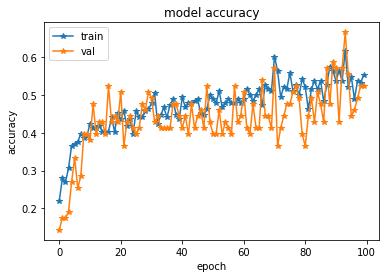

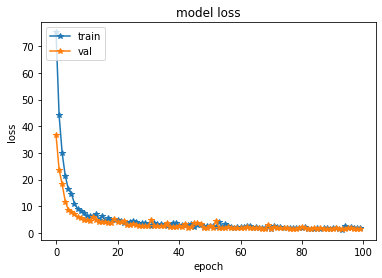

In [106]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = "*")
plt.plot(history.history['val_accuracy'], marker = "*")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = "*")
plt.plot(history.history['val_loss'], marker = "*")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [107]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 9ms/step - loss: 2.2158 - accuracy: 0.5397
Test loss: 2.2158308029174805
Test accuracy: 0.5396825671195984


In [14]:
result = model.predict(x_test[100].reshape((1,30)))
print(result.round(1)==y_test[100])

[[ True  True]]
